In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# problems = pd.read_csv('problems_features.csv')
# tags = problems['tags'].unique()

# [one_hot(d, 50) for d in tags[1:]]

# max_length = 4
# padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# print(padded_docs)

In [ ]:
# max_length = 4
# padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# print(padded_docs)

In [ ]:
# model = Sequential()
# e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
# model.add(e)
# model.add(Flatten())


In [2]:
results = pd.read_csv('data/train/train_submissions.csv')
test = pd.read_csv('data/test_submissions_NeDLEvX.csv')
users = pd.read_csv('cleaned_users.csv')
problems = pd.read_csv('problems_features.csv')
results.shape, test.shape, problems.shape, users.shape

((155295, 3), (66555, 3), (6544, 7), (3571, 11))

In [3]:
test_save = test.copy()

In [4]:
users.head()

,Unnamed: 0,user_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,rank_enc,contribution_abs
0,0,user_3311,47,40,0,4,348.337,330.849,intermediate,3,0
1,1,user_3028,63,52,0,17,405.677,339.450,intermediate,3,0
2,2,user_2268,226,203,-8,24,307.339,284.404,beginner,1,8
3,3,user_480,611,490,1,94,525.803,471.330,advanced,0,1
4,4,user_650,504,479,12,4,548.739,486.525,advanced,0,12


In [5]:
problems.columns

Index(['Unnamed: 0', 'problem_id', 'level_type', 'points', 'tags', 'tag_dict',
       'tag_vect'],
      dtype='object')

In [6]:
users.columns

Index(['Unnamed: 0', 'user_id', 'submission_count', 'problem_solved',
       'contribution', 'follower_count', 'max_rating', 'rating', 'rank',
       'rank_enc', 'contribution_abs'],
      dtype='object')

In [ ]:
# temp = pd.concat([test, results], axis=0, ignore_index=True)
# df.pivot_table('col3',index='col1',columns='col2')
# np.argwhere(df.notnull().values)

In [7]:
users.head()

,Unnamed: 0,user_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,rank_enc,contribution_abs
0,0,user_3311,47,40,0,4,348.337,330.849,intermediate,3,0
1,1,user_3028,63,52,0,17,405.677,339.450,intermediate,3,0
2,2,user_2268,226,203,-8,24,307.339,284.404,beginner,1,8
3,3,user_480,611,490,1,94,525.803,471.330,advanced,0,1
4,4,user_650,504,479,12,4,548.739,486.525,advanced,0,12


### Encoding all user and prob ids

In [7]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

u_ids = list(users.user_id.values) + list(results.user_id.values) + list(test.user_id.values)
p_ids = list(problems.problem_id.values) + list(results.problem_id.values) + list(test.problem_id.values)

enc.fit(u_ids)
users['user_id_enc'] = enc.transform(users.user_id)
results['user_id_enc'] = enc.transform(results.user_id)
test['user_id_enc'] = enc.transform(test.user_id)

enc.fit(p_ids)
problems['problem_id_enc'] = enc.transform(problems.problem_id)
results['problem_id_enc'] = enc.transform(results.problem_id)
test['problem_id_enc'] = enc.transform(test.problem_id)

In [8]:
cols = users.columns
cols

Index(['Unnamed: 0', 'user_id', 'submission_count', 'problem_solved',
       'contribution', 'follower_count', 'max_rating', 'rating', 'rank',
       'rank_enc', 'contribution_abs', 'user_id_enc'],
      dtype='object')

In [87]:
# plt.plot(users[cols[idx]])
# plt.title(cols[idx])
# idx += 1

## Replacing the outliers with the median of that feature

In [9]:
cols = ['submission_count', 'problem_solved',
       'contribution_abs', 'follower_count', 'max_rating', 'rating']
for idx in cols:
    mean, std = users[idx].mean(), users[idx].std()
    median = users[idx].loc[(users[idx] - mean).abs() < 3*std].median()
    users[idx +'new'] = np.where((users[idx] - mean).abs() > 3*std, median,users[idx])
    

In [10]:
problems.columns

Index(['Unnamed: 0', 'problem_id', 'level_type', 'points', 'tags', 'tag_dict',
       'tag_vect', 'problem_id_enc'],
      dtype='object')

In [11]:
users.head()

,Unnamed: 0,user_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,rank_enc,contribution_abs,user_id_enc,submission_countnew,problem_solvednew,contribution_absnew,follower_countnew,max_ratingnew,ratingnew
0,0,user_3311,47,40,0,4,348.337,330.849,intermediate,3,0,2570,47.0,40.0,0.0,4.0,348.337,330.849
1,1,user_3028,63,52,0,17,405.677,339.450,intermediate,3,0,2255,63.0,52.0,0.0,17.0,405.677,339.450
2,2,user_2268,226,203,-8,24,307.339,284.404,beginner,1,8,1410,226.0,203.0,8.0,24.0,307.339,284.404
3,3,user_480,611,490,1,94,525.803,471.330,advanced,0,1,2995,611.0,490.0,1.0,94.0,525.803,471.330
4,4,user_650,504,479,12,4,548.739,486.525,advanced,0,12,3184,504.0,479.0,12.0,4.0,548.739,486.525


In [12]:
problems['level_type'] = problems['level_type'].fillna('O')

In [13]:
enc.fit(problems['level_type'])
problems['level_type_enc'] = enc.transform(problems['level_type'])

In [14]:
problems.head()

,Unnamed: 0,problem_id,level_type,points,tags,tag_dict,tag_vect,problem_id_enc,level_type_enc
0,0,prob_3649,H,NaN,NaN,NaN,NaN,2944,7
1,1,prob_6191,A,NaN,NaN,NaN,NaN,5769,0
2,2,prob_2020,F,NaN,NaN,NaN,NaN,1136,5
3,3,prob_313,A,500.0,"greedy,implementation","['greedy', 'implementation']","(0, 35)\t0.643835105031232\n (0, 33)\t0.765...",2368,0
4,4,prob_101,A,500.0,"constructive algorithms,greedy,math","['constructive algorithms', 'greedy', 'math']","(0, 37)\t0.4053203601812274\n (0, 33)\t0.40...",13,0


In [105]:
problems['tags'].fillna('The')[:5]

0                                    The
1                                    The
2                                    The
3                  greedy,implementation
4    constructive algorithms,greedy,math
Name: tags, dtype: object

In [15]:
problems['tags_list'] = problems['tags'].fillna('The')

## convert tags into sequnce

In [16]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [114]:
tags = problems['tags_list']#.unique()

[one_hot(d, 50) for d in tags][:6]


[[33], [33], [33], [28, 13], [47, 14, 28, 39], [33]]

In [121]:
problems['tags_list_seq'] = problems['tags_list'].map(lambda x: one_hot(x,10))

In [ ]:
pad_sequences([one_hot(d, 50) for d in tags], maxlen=5, padding='post')

In [115]:
pads = pad_sequences([one_hot(d, 50) for d in tags], maxlen=5, padding='post')[:6]

array([[33,  0,  0,  0,  0],
       [33,  0,  0,  0,  0],
       [33,  0,  0,  0,  0],
       [28, 13,  0,  0,  0],
       [47, 14, 28, 39,  0],
       [33,  0,  0,  0,  0]], dtype=int32)

In [18]:
tags = problems['tags_list']#.unique()
pads = pad_sequences([one_hot(d, 80) for d in tags], maxlen=5, padding='post')

In [19]:
pads

array([[ 2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       ...,
       [60, 55,  7, 69,  0],
       [45,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0]], dtype=int32)

In [144]:
# pads_list = []
# for i in range(pads.shape[0]):
# #     print(pads[i])
#     pads_list.append(list(pads[i]))

In [20]:
for i in range(pads.shape[1]):
    waste = pd.Series(pads[:,i])
    problems['tags_list_seq_pad'+str(i)] = waste.values

In [150]:
# waste = pd.Series(pads_list)
# problems['tags_list_seq_pad'] = waste.values

In [21]:
problems.head()

,Unnamed: 0,problem_id,level_type,points,tags,tag_dict,tag_vect,problem_id_enc,level_type_enc,tags_list,tags_list_seq_pad0,tags_list_seq_pad1,tags_list_seq_pad2,tags_list_seq_pad3,tags_list_seq_pad4
0,0,prob_3649,H,NaN,NaN,NaN,NaN,2944,7,The,2,0,0,0,0
1,1,prob_6191,A,NaN,NaN,NaN,NaN,5769,0,The,2,0,0,0,0
2,2,prob_2020,F,NaN,NaN,NaN,NaN,1136,5,The,2,0,0,0,0
3,3,prob_313,A,500.0,"greedy,implementation","['greedy', 'implementation']","(0, 35)\t0.643835105031232\n (0, 33)\t0.765...",2368,0,"greedy,implementation",49,45,0,0,0
4,4,prob_101,A,500.0,"constructive algorithms,greedy,math","['constructive algorithms', 'greedy', 'math']","(0, 37)\t0.4053203601812274\n (0, 33)\t0.40...",13,0,"constructive algorithms,greedy,math",66,65,49,76,0


# Save all encoded features

In [27]:
users.to_csv('users_feature_encoded_before_drop_new.csv')
problems.to_csv('problems_feature_encoded_before_drop_new.csv')
results.to_csv('results_feature_encoded_before_drop_new.csv')
test.to_csv('tests_feature_encoded_before_drop_new.csv')


### Drop unnecaasry columns

In [30]:
import gc
del users,problems,test,results#,testing
gc.collect()

103

In [2]:
users = pd.read_csv( 'users_feature_encoded_before_drop_new.csv')
problems = pd.read_csv( 'problems_feature_encoded_before_drop_new.csv')
results = pd.read_csv( 'results_feature_encoded_before_drop_new.csv')
tests = pd.read_csv( 'tests_feature_encoded_before_drop_new.csv')

In [3]:
users.head()

,Unnamed: 0,Unnamed: 0.1,user_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,rank_enc,contribution_abs,user_id_enc,submission_countnew,problem_solvednew,contribution_absnew,follower_countnew,max_ratingnew,ratingnew
0,0,0,user_3311,47,40,0,4,348.337,330.849,intermediate,3,0,2570,47.0,40.0,0.0,4.0,348.337,330.849
1,1,1,user_3028,63,52,0,17,405.677,339.450,intermediate,3,0,2255,63.0,52.0,0.0,17.0,405.677,339.450
2,2,2,user_2268,226,203,-8,24,307.339,284.404,beginner,1,8,1410,226.0,203.0,8.0,24.0,307.339,284.404
3,3,3,user_480,611,490,1,94,525.803,471.330,advanced,0,1,2995,611.0,490.0,1.0,94.0,525.803,471.330
4,4,4,user_650,504,479,12,4,548.739,486.525,advanced,0,12,3184,504.0,479.0,12.0,4.0,548.739,486.525


In [36]:
problems.head()

,Unnamed: 0,Unnamed: 0.1,problem_id,level_type,points,tags,tag_dict,tag_vect,problem_id_enc,level_type_enc,tags_list,tags_list_seq_pad0,tags_list_seq_pad1,tags_list_seq_pad2,tags_list_seq_pad3,tags_list_seq_pad4
0,0,0,prob_3649,H,NaN,NaN,NaN,NaN,2944,7,The,2,0,0,0,0
1,1,1,prob_6191,A,NaN,NaN,NaN,NaN,5769,0,The,2,0,0,0,0
2,2,2,prob_2020,F,NaN,NaN,NaN,NaN,1136,5,The,2,0,0,0,0
3,3,3,prob_313,A,500.0,"greedy,implementation","['greedy', 'implementation']","(0, 35)\t0.643835105031232\n (0, 33)\t0.765...",2368,0,"greedy,implementation",49,45,0,0,0
4,4,4,prob_101,A,500.0,"constructive algorithms,greedy,math","['constructive algorithms', 'greedy', 'math']","(0, 37)\t0.4053203601812274\n (0, 33)\t0.40...",13,0,"constructive algorithms,greedy,math",66,65,49,76,0


In [37]:
problems.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'problem_id', 'level_type', 'points',
       'tags', 'tag_dict', 'tag_vect', 'problem_id_enc', 'level_type_enc',
       'tags_list', 'tags_list_seq_pad0', 'tags_list_seq_pad1',
       'tags_list_seq_pad2', 'tags_list_seq_pad3', 'tags_list_seq_pad4'],
      dtype='object')

In [4]:
u_ids = ['Unnamed: 0', 'Unnamed: 0.1', 'user_id', 'submission_count',
       'problem_solved', 'contribution', 'follower_count', 'max_rating',
       'rating', 'rank', 'contribution_abs']
p_ids = ['Unnamed: 0', 'Unnamed: 0.1', 'problem_id', 'level_type', 'points',
         'tag_dict', 'tag_vect']
r_ids = ['Unnamed: 0', 'user_id', 'problem_id']
t_ids = ['Unnamed: 0', 'ID', 'user_id', 'problem_id']

In [5]:
users.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user_id', 'submission_count',
       'problem_solved', 'contribution', 'follower_count', 'max_rating',
       'rating', 'rank', 'rank_enc', 'contribution_abs', 'user_id_enc',
       'submission_countnew', 'problem_solvednew', 'contribution_absnew',
       'follower_countnew', 'max_ratingnew', 'ratingnew'],
      dtype='object')

In [6]:
users.drop(u_ids, axis=1, inplace=True)
problems.drop(p_ids, axis=1, inplace=True)
results.drop(r_ids, axis=1, inplace=True)
tests.drop(t_ids, axis=1, inplace=True)

In [7]:
users.columns.shape, problems.columns.shape, results.columns.shape, tests.columns.shape

((8,), (9,), (3,), (2,))

In [8]:
users.head()

,rank_enc,user_id_enc,submission_countnew,problem_solvednew,contribution_absnew,follower_countnew,max_ratingnew,ratingnew
0,3,2570,47.0,40.0,0.0,4.0,348.337,330.849
1,3,2255,63.0,52.0,0.0,17.0,405.677,339.450
2,1,1410,226.0,203.0,8.0,24.0,307.339,284.404
3,0,2995,611.0,490.0,1.0,94.0,525.803,471.330
4,0,3184,504.0,479.0,12.0,4.0,548.739,486.525


In [9]:
results.head()

,attempts_range,user_id_enc,problem_id_enc
0,1,1468,6120
1,3,2854,2216
2,1,669,4525
3,1,1397,6216
4,1,1470,2845


In [10]:
problems.head()

,tags,problem_id_enc,level_type_enc,tags_list,tags_list_seq_pad0,tags_list_seq_pad1,tags_list_seq_pad2,tags_list_seq_pad3,tags_list_seq_pad4
0,NaN,2944,7,The,2,0,0,0,0
1,NaN,5769,0,The,2,0,0,0,0
2,NaN,1136,5,The,2,0,0,0,0
3,"greedy,implementation",2368,0,"greedy,implementation",49,45,0,0,0
4,"constructive algorithms,greedy,math",13,0,"constructive algorithms,greedy,math",66,65,49,76,0


In [11]:
rating_temp = pd.merge(results,users,on='user_id_enc',how='inner')

In [12]:
rating_temp.shape

(155295, 10)

In [13]:
rating_temp2 = pd.merge(rating_temp, problems,on='problem_id_enc',how='inner')

In [14]:
rating_temp2.head()

,attempts_range,user_id_enc,problem_id_enc,rank_enc,submission_countnew,problem_solvednew,contribution_absnew,follower_countnew,max_ratingnew,ratingnew,tags,level_type_enc,tags_list,tags_list_seq_pad0,tags_list_seq_pad1,tags_list_seq_pad2,tags_list_seq_pad3,tags_list_seq_pad4
0,1,1468,6120,1,53.0,47.0,0.0,1.0,307.913,206.709,strings,1,strings,18,0,0,0,0
1,2,1013,6120,1,240.0,218.0,0.0,50.0,319.954,291.284,strings,1,strings,18,0,0,0,0
2,2,917,6120,1,370.0,336.0,10.0,30.0,307.339,295.585,strings,1,strings,18,0,0,0,0
3,1,3455,6120,1,318.0,286.0,0.0,20.0,304.186,191.514,strings,1,strings,18,0,0,0,0
4,1,3326,6120,3,463.0,410.0,0.0,39.0,374.713,374.713,strings,1,strings,18,0,0,0,0


In [50]:
rating_temp2.to_csv('merged_all_feature_encoded_after_drop_new.csv',index=None)

In [15]:
rating_temp2.isnull().sum()

attempts_range             0
user_id_enc                0
problem_id_enc             0
rank_enc                   0
submission_countnew        0
problem_solvednew          0
contribution_absnew        0
follower_countnew          0
max_ratingnew              0
ratingnew                  0
tags                   15427
level_type_enc             0
tags_list                  0
tags_list_seq_pad0         0
tags_list_seq_pad1         0
tags_list_seq_pad2         0
tags_list_seq_pad3         0
tags_list_seq_pad4         0
dtype: int64

In [16]:
rating_temp2.user_id_enc.unique().shape, rating_temp2.problem_id_enc.unique().shape

((3529,), (5776,))

In [17]:
tests.user_id_enc.unique().shape

(3501,)

In [18]:
users.user_id_enc.unique().shape

(3571,)

In [21]:
results.user_id_enc.unique().shape, results.problem_id_enc.unique().shape, results.shape

((3529,), (5776,), (155295, 3))

In [23]:
temp = results
temp2 = pd.merge(temp, tests, on=['user_id_enc', 'problem_id_enc'], how='inner')
temp2.shape

(0, 3)

In [31]:
pd.merge(results, tests, on=['problem_id_enc'], how='inner').isnull().sum()

attempts_range    0
user_id_enc_x     0
problem_id_enc    0
user_id_enc_y     0
dtype: int64

In [32]:
results1 = pd.read_csv('data/train/train_submissions.csv')
tests1 = pd.read_csv('data/test_submissions_NeDLEvX.csv')

In [35]:
results1.problem_id.unique().shape, tests1.problem_id.unique().shape, results1.shape, tests1.shape

((5776,), (4716,), (155295, 3), (66555, 3))

In [43]:
# results1 = pd.concat((results1,tests1), axis=0)
temp2 = pd.concat([results, tests], ignore_index=True)
temp2.isnull().sum()

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


attempts_range    66555
problem_id_enc        0
user_id_enc           0
dtype: int64

In [39]:
tests.shape, results.shape, temp.shape

((66555, 3), (155295, 3), (221850, 4))

In [44]:
tests.shape, results.shape, temp2.shape

((66555, 2), (155295, 3), (221850, 3))

In [46]:
# pd.crosstab(temp2.user_id_enc, temp2.problem_id_enc, temp2.attempts_range)
temp2.pivot_table(
            values='attempts_range', index='user_id_enc', columns='problem_id_enc',
            fill_value=0, aggfunc=[np.abs])

absolute                                              ...   \
problem_id_enc     0    1    2    3    4    5    6    7    8    9    ...    
user_id_enc                                                          ...    
0                     0    0    0    0    0    0    0    0    0    0 ...    
1                     0    0    0    0    0    0    0    0    0    0 ...    
2                     0    0    0    0    0    0    0    0    0    0 ...    
3                     0    0    0    1    0    0    0    0    0    0 ...    
4                     0    0    0    0    0    0    0    0    0    0 ...    
5                     0    0    0    0    0    0    0    0    0    0 ...    
6                     0    0    0    0    0    0    0    0    0    0 ...    
7                     0    0    0    0    0    0    0    0    0    0 ...    
8                     0    0    0    0    0    0    0    0    0    0 ...    
9                     0    0    0    0    0    0    0    0    0    0 ...    
10                    0    0    0    0    0    0    0    0    0    0 ...    
11                    0    0    0    0    0    0    0    0    1    0 ...    
12                    0    0    0    0    0    0    0    0    0    0 ...    
13                    0    0    0    0    0    0    0    0    0    0 ...    
14                    0    0    0    0    0    0    0    0    0    0 ...    
15                    0    0    0    0    0    0    0    0    0    0 ...    
16                    0    0    0    0    0    0    0    0    0    0 ...    
17                    0    0    0    0    0    0    0    0    0    0 ...    
18                    0    0    0    0    0    0    0    0    0    0 ...    
19                    0    0    0    0    0    0    0    0    0    0 ...    
20                    0    0    0    0    0    0    0    0    0    0 ...    
21                    0    0    0    1    0    0    0    0    0    0 ...    
22                    0    0    0    0    0    0    0    0    0    0 ...    
23                    0    0    0    0    0    0    0    0    0    0 ...    
24                    0    0    0    0    0    0    0    0    0    0 ...    
25                    0    0    0    0    0    0    0    0    0    0 ...    
26                    0    0    0    0    0    0    0    0    0    0 ...    
27                    0    0    0    1    0    0    0    0    0    0 ...    
28                    0    0    0    0    0    0    0    0    0    0 ...    
29                    0    0    0    0    0    0    0    0    0    0 ...    
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...    
3541                  0    0    0    0    0    0    0    0    0    0 ...    
3542                  0    0    0    2    0    0    0    0    0    0 ...    
3543                  0    0    0    0    0    0    0    0    0    0 ...    
3544                  0    0    0    0    0    0    0    0    0    1 ...    
3545                  0    0    0    0    0    0    0    0    0    0 ...    
3546                  0    0    0    0    0    0    0    0    1    0 ...    
3547                  0    0    0    0    0    0    0    0    0    0 ...    
3548                  0    0    0    0    0    0    0    0    0    0 ...    
3549                  0    0    0    0    0    0    0    0    0    2 ...    
3550                  0    0    0    0    0    0    0    0    0    0 ...    
3551                  0    0    0    0    0    0    0    0    0    0 ...    
3552                  0    0    0    0    0    0    0    0    0    0 ...    
3553                  0    0    0    0    0    0    0    0    0    0 ...    
3554                  0    0    0    0    0    0    0    0    0    0 ...    
3555                  0    0    0    0    0    0    0    0    1    0 ...    
3556                  0    0    0    0    0    0    0    0    0    0 ...    
3557                  0    0    0    0    0    0    0    0    0    0 ...    
3558                  0    0    0    0    0    0    0    0    0    0 ...    
3559       

In [47]:
table = temp2.pivot_table(
            values='attempts_range', index='user_id_enc', columns='problem_id_enc',
            fill_value=0, aggfunc=[np.abs])

In [ ]:
temp2.dropna(inplace=True)

In [55]:
table.index.max(), table.columns.max()

(3570, ('absolute', 6543))

In [ ]:
N = 5
M = 3
K = 2
N_u = 5

# availbale users
ns = np.random.randint(1,N,[1,3])[0]
ms = np.random.randint(1,M,[1,2])[0]


In [ ]:
theta_n = np.random.randn(N,1)
theta_m = np.random.randn(M,1)
lambda_x,lambda_u,lambda_v = 1,1,1

In [82]:
def matrix_factorization(R, P, Q, K, steps=500, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

###############################################################################

In [83]:
R = np.array(table.values)
N = 3571
M = 6543
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)


In [85]:
nP.shape, nQ.shape

((3571, 2), (6543, 2))

In [86]:
np.save('user_latent.npy',nP)
np.save('problem_latent.npy',nQ)

In [74]:
nP

array([[0.32100566, 0.94261062],
       [0.92968918, 0.9284778 ],
       [0.93710097, 0.60993356],
       ...,
       [0.92631469, 0.73271113],
       [0.52664128, 0.75937477],
       [0.76039866, 0.19287833]])

In [87]:
pred = np.dot(nP, nQ.T)


array([[0.95626365, 1.61574592, 0.4127771 , ..., 0.91253892, 0.81337708,
        0.7437047 ],
       [1.49558454, 2.67507341, 0.59462732, ..., 1.43282805, 1.31186309,
        1.31590918],
       [1.42038794, 2.5017955 , 0.57807373, ..., 1.35931273, 1.23549321,
        1.20973855],
       ...,
       [0.5246389 , 0.84964523, 0.23912961, ..., 0.49925083, 0.43636458,
        0.37004587],
       [1.22321498, 1.98351598, 0.55666659, ..., 1.16411818, 1.01808118,
        0.86539286],
       [0.60577002, 1.32891453, 0.15640119, ..., 0.58967978, 0.59723955,
        0.78618563]])

In [94]:
pred_sub = np.round(pred)
pred_sub

array([[1., 2., 0., ..., 1., 1., 1.],
       [1., 3., 1., ..., 1., 1., 1.],
       [1., 3., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 2., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [95]:
sub = pd.read_csv('data/sample_submissions_wbscxqU.csv')
sub.head()

,ID,attempts_range


In [97]:
tests.shape

(66555, 2)

In [98]:
for user in tests:
    print(user)

user_id_enc
problem_id_enc


In [100]:
table.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570],
           dtype='int64', name='user_id_enc', length=3529)

In [101]:
table.columns

MultiIndex(levels=[['absolute'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 155, 157, 158, 159, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 224, 225, 227, 228, 230, 231, 232, 233, 234, 235, 238, 241, 242, 243,

In [105]:
test_sub = pd.read_csv('tests_feature_encoded_before_drop_new.csv')
test_sub.head()

,Unnamed: 0,ID,user_id,problem_id,user_id_enc,problem_id_enc
0,0,user_856_prob_5822,user_856,prob_5822,3412,5359
1,1,user_2642_prob_2334,user_2642,prob_2334,1826,1484
2,2,user_2557_prob_2920,user_2557,prob_2920,1731,2135
3,3,user_1572_prob_4598,user_1572,prob_4598,637,3998
4,4,user_295_prob_6139,user_295,prob_6139,2167,5711


In [106]:
test_sub['attempt'] = test_sub['Unnamed: 0']
test_sub.head()

,Unnamed: 0,ID,user_id,problem_id,user_id_enc,problem_id_enc,attempt
0,0,user_856_prob_5822,user_856,prob_5822,3412,5359,0
1,1,user_2642_prob_2334,user_2642,prob_2334,1826,1484,1
2,2,user_2557_prob_2920,user_2557,prob_2920,1731,2135,2
3,3,user_1572_prob_4598,user_1572,prob_4598,637,3998,3
4,4,user_295_prob_6139,user_295,prob_6139,2167,5711,4


In [107]:
for i in range(test_sub.shape[0]):
    test_sub.iloc[i]['attempt'] = 10

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [115]:
test_sub['attempt'].iloc[0] = 100

/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [116]:
test_sub.head()

,Unnamed: 0,ID,user_id,problem_id,user_id_enc,problem_id_enc,attempt
0,0,user_856_prob_5822,user_856,prob_5822,3412,5359,100
1,1,user_2642_prob_2334,user_2642,prob_2334,1826,1484,1
2,2,user_2557_prob_2920,user_2557,prob_2920,1731,2135,2
3,3,user_1572_prob_4598,user_1572,prob_4598,637,3998,3
4,4,user_295_prob_6139,user_295,prob_6139,2167,5711,4


In [118]:
for i in range(test_sub.shape[0]):
    if i%100 == 0:
        print("==",i)
    test_sub['attempt'].iloc[i] = pred_sub[test_sub['user_id_enc'].iloc[i]][test_sub['problem_id_enc'].iloc[i]]
#     print(pred_sub[test_sub['user_id_enc'].iloc[i]][test_sub['problem_id_enc'].iloc[i]])

== 0


/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


== 100
== 200
== 300
== 400
== 500
== 600
== 700
== 800
== 900
== 1000
== 1100
== 1200
== 1300
== 1400
== 1500
== 1600
== 1700
== 1800
== 1900
== 2000
== 2100
== 2200
== 2300
== 2400
== 2500
== 2600
== 2700
== 2800
== 2900
== 3000
== 3100
== 3200
== 3300
== 3400
== 3500
== 3600
== 3700
== 3800
== 3900
== 4000
== 4100
== 4200
== 4300
== 4400
== 4500
== 4600
== 4700
== 4800
== 4900
== 5000
== 5100
== 5200
== 5300
== 5400
== 5500
== 5600
== 5700
== 5800
== 5900
== 6000
== 6100
== 6200
== 6300
== 6400
== 6500
== 6600
== 6700
== 6800
== 6900
== 7000
== 7100
== 7200
== 7300
== 7400
== 7500
== 7600
== 7700
== 7800
== 7900
== 8000
== 8100
== 8200
== 8300
== 8400
== 8500
== 8600
== 8700
== 8800
== 8900
== 9000
== 9100
== 9200
== 9300
== 9400
== 9500
== 9600
== 9700
== 9800
== 9900
== 10000
== 10100
== 10200
== 10300
== 10400
== 10500
== 10600
== 10700
== 10800
== 10900
== 11000
== 11100
== 11200
== 11300
== 11400
== 11500
== 11600
== 11700
== 11800
== 11900
== 12000
== 12100
== 12200
== 12300
=

IndexError: index 6543 is out of bounds for axis 0 with size 6543

In [146]:
for i in range(35200, test_sub.shape[0]):
    if i%100 == 0:
        print("==",i)
        
        
    try:
        test_sub['attempt'].iloc[i] = pred_sub[test_sub['user_id_enc'].iloc[i]][test_sub['problem_id_enc'].iloc[i]]
    except:
        test_sub['attempt'].iloc[i] = 0
        
    
#     print(pred_sub[test_sub['user_id_enc'].iloc[i]][test_sub['problem_id_enc'].iloc[i]])

== 35200


/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


== 35300
== 35400
== 35500
== 35600
== 35700
== 35800
== 35900
== 36000
== 36100
== 36200
== 36300
== 36400
== 36500
== 36600
== 36700
== 36800
== 36900
== 37000
== 37100
== 37200
== 37300
== 37400
== 37500
== 37600
== 37700
== 37800
== 37900
== 38000
== 38100
== 38200
== 38300
== 38400
== 38500
== 38600
== 38700
== 38800
== 38900
== 39000
== 39100
== 39200
== 39300
== 39400
== 39500
== 39600
== 39700
== 39800
== 39900
== 40000
== 40100
== 40200
== 40300
== 40400
== 40500
== 40600
== 40700
== 40800
== 40900
== 41000
== 41100
== 41200
== 41300
== 41400
== 41500
== 41600
== 41700
== 41800
== 41900
== 42000
== 42100
== 42200
== 42300
== 42400
== 42500
== 42600
== 42700
== 42800
== 42900
== 43000
== 43100
== 43200
== 43300
== 43400
== 43500
== 43600
== 43700
== 43800
== 43900
== 44000
== 44100
== 44200
== 44300
== 44400
== 44500
== 44600
== 44700
== 44800
== 44900
== 45000
== 45100
== 45200
== 45300
== 45400
== 45500
== 45600
== 45700
== 45800
== 45900
== 46000
== 46100
== 46200
== 46300
=

In [147]:
test_sub.attempt = test_sub.attempt.astype(int)

In [148]:
test_sub.head()

,ID,attempt
0,user_856_prob_5822,1
1,user_2642_prob_2334,2
2,user_2557_prob_2920,2
3,user_1572_prob_4598,1
4,user_295_prob_6139,2


In [149]:
test_sub.attempt.unique()

array([1, 2, 3, 5, 0, 4, 6, 7])

In [151]:
results.attempts_range.unique()

array([1, 3, 2, 4, 5, 6])

In [164]:
test_sub[test_sub.attempt == 0]

,ID,attempt
49,user_1081_prob_6228,0
69,user_259_prob_6266,0
113,user_1163_prob_902,0
118,user_1770_prob_713,0
122,user_1290_prob_969,0
268,user_541_prob_6318,0
270,user_2473_prob_703,0
274,user_2661_prob_6321,0
290,user_2431_prob_988,0
376,user_2055_prob_703,0


In [162]:
test_sub.attempt.value_counts()

0    32283
1    15899
2    13830
3     3692
4      731
5      103
6       14
7        3
Name: attempt, dtype: int64

In [173]:
test_sub.attempt = test_sub.attempt.apply(lambda x: np.random.randint(1,8) if x == 0 else x)

In [174]:
test_sub.attempt.unique()

array([1, 2, 3, 5, 4, 6, 7])

In [182]:
test_sub.to_csv('submit.csv', index=None)

In [180]:
test_sub.rename(columns={'attempt': 'attempts_range'}, inplace=True)

In [130]:
# cols = ['Unnamed: 0', 'user_id', 'problem_id', 'user_id_enc', 'problem_id_enc']
# test_sub.drop(cols, axis=1, inplace=True)
# test_sub.to_csv('submit.csv', index=None)

In [181]:
test_sub.head()

,ID,attempts_range
0,user_856_prob_5822,1
1,user_2642_prob_2334,2
2,user_2557_prob_2920,2
3,user_1572_prob_4598,1
4,user_295_prob_6139,2


In [134]:
test_sub[test_sub.attempt > 5]

,ID,attempt
4175,user_2939_prob_1625,6
8380,user_3527_prob_5845,6
8781,user_1157_prob_1537,6
10311,user_1111_prob_1625,7
12237,user_364_prob_3929,7
12974,user_1349_prob_1625,6
14907,user_740_prob_1625,6
15523,user_2047_prob_1276,6
21415,user_1498_prob_4844,6
21515,user_2515_prob_2876,6


In [140]:
pred_sub[pred_sub<1]

array([0., 0., 0., ..., 0., 0., 0.])

In [145]:
test_sub[test_sub.attempt > 6].shape, test_sub.shape

((30976, 2), (66555, 2))

In [176]:
results.columns

Index(['attempts_range', 'user_id_enc', 'problem_id_enc'], dtype='object')

In [ ]:
def matrix_factorization(R, P, Q, K, steps=5, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

###############################################################################

In [61]:
table.shape

(3529, 5776)

In [63]:
table.index.max()

3570

In [64]:
np.array(table.values)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# STARTED FROM HERE

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('merged_all_feature_encoded_after_drop_non_null_new.csv')

In [3]:
data.columns

Index(['attempts_range', 'user_id_enc', 'problem_id_enc', 'rank_enc',
       'submission_countnew', 'problem_solvednew', 'contribution_absnew',
       'follower_countnew', 'max_ratingnew', 'ratingnew', 'tags',
       'level_type_enc', 'tags_list', 'tags_list_seq_pad0',
       'tags_list_seq_pad1', 'tags_list_seq_pad2', 'tags_list_seq_pad3',
       'tags_list_seq_pad4'],
      dtype='object')

In [4]:
data.head()

,attempts_range,user_id_enc,problem_id_enc,rank_enc,submission_countnew,problem_solvednew,contribution_absnew,follower_countnew,max_ratingnew,ratingnew,tags,level_type_enc,tags_list,tags_list_seq_pad0,tags_list_seq_pad1,tags_list_seq_pad2,tags_list_seq_pad3,tags_list_seq_pad4
0,1,1468,6120,1,53.0,47.0,0.0,1.0,307.913,206.709,strings,1,strings,18,0,0,0,0
1,2,1013,6120,1,240.0,218.0,0.0,50.0,319.954,291.284,strings,1,strings,18,0,0,0,0
2,2,917,6120,1,370.0,336.0,10.0,30.0,307.339,295.585,strings,1,strings,18,0,0,0,0
3,1,3455,6120,1,318.0,286.0,0.0,20.0,304.186,191.514,strings,1,strings,18,0,0,0,0
4,1,3326,6120,3,463.0,410.0,0.0,39.0,374.713,374.713,strings,1,strings,18,0,0,0,0


In [5]:
data.dtypes

attempts_range           int64
user_id_enc              int64
problem_id_enc           int64
rank_enc                 int64
submission_countnew    float64
problem_solvednew      float64
contribution_absnew    float64
follower_countnew      float64
max_ratingnew          float64
ratingnew              float64
tags                    object
level_type_enc           int64
tags_list               object
tags_list_seq_pad0       int64
tags_list_seq_pad1       int64
tags_list_seq_pad2       int64
tags_list_seq_pad3       int64
tags_list_seq_pad4       int64
dtype: object

In [6]:
data['user_id_enc'].unique().max(), data['problem_id_enc'].unique().max()

(3570, 6543)

In [7]:
data['attempts_range'] = data['attempts_range']-1

## dataset generate function

In [9]:
def generate_dataset(dataset, batch_size):
    ''' return dataset for users, problems, users-info, 
        dataset has columns: ['attempts_range', 'user_id_enc', 'problem_id_enc', 'rank_enc',
                               'submission_countnew', 'problem_solvednew', 'contribution_absnew',
                               'follower_countnew', 'max_ratingnew', 'ratingnew', 'tags',
                               'level_type_enc', 'tags_list', 'tags_list_seq_pad0',
                               'tags_list_seq_pad1', 'tags_list_seq_pad2', 'tags_list_seq_pad3',
                               'tags_list_seq_pad4'], dtype='object')
    users             ==>> [batch,N]
    problems          ==>> [batch,M]
    user-info         ==>> [batch,omega_u]
    prob-info         ==>> [batch,omega_v]
    label             ==>> [batch,label]
    problems_level    ==>> [batch,level_type]
    problems_info_emb ==>> [batch,seq_length]
    '''
    N = 3570+1
    M = 6543+1
#     N = dataset['user_id_enc'].unique().shape[0]
#     M = 6543#dataset['problem_id_enc'].unique().shape[0]
    label_shape = dataset['attempts_range'].unique().shape[0]
    problems_info_level_shape = dataset['level_type_enc'].unique().shape[0]
    
    idx = np.random.randint(dataset.shape[0],size=(batch_size))
    temp = dataset.values[idx]
    users = temp[:,:3]# first three columns
    users_info = temp[:,3:10]
    problems_info_level = temp[:,11]
    problems_info_emb = temp[:,13:]
#     problems_info[:,1] = problems_info[:,1].astype(int)
    
    # user one-hot matrix
    users = np.zeros((batch_size,N))
    users[np.arange(batch_size), temp[:,1].astype(int)[0]] = 1  #one-hot vectors
    
    # problems one-hot matrix
    problems = np.zeros((batch_size,M))
    problems[np.arange(batch_size), temp[:,2].astype(int)[0]] = 1
    
    # label one-hot matrix (for softmax classification)
    labels = np.zeros((batch_size,label_shape))
    labels[np.arange(batch_size),temp[:,0].astype(int)[0]] = 1
    
    # problem one-hot matrix
    problems_level = np.zeros((batch_size,problems_info_level_shape))
    problems_level[np.arange(batch_size),temp[:,11].astype(int)[0]] = 1
                          
    return users, problems, labels, users_info.astype(float), problems_level, problems_info_emb.astype(int)

In [10]:
users, problems, labels, users_info, problems_level, problems_info_emb = generate_dataset(dataset=data, batch_size=2)
users.shape, problems.shape, labels.shape, users_info.shape, problems_level.shape, problems_info_emb.shape

((2, 3571), (2, 6544), (2, 6), (2, 7), (2, 15), (2, 5))

## Previously: (2, 3526), (2, 5776), (2, 6), (2, 7), (2, 2)

# ((2902,), 6543) ===========>>(3570, 6543)

In [11]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Activation, Dense, Dropout
from keras.layers import concatenate

import tensorflow as tf

Using TensorFlow backend.


In [ ]:
# input_user = tf.placeholder(tf.int32,shape=(None,),name='batch-user')
# input_user_hot = tf.one_hot(input_user,N, name='one-hot-user')
# user_latent = Dense(K,activation='linear', name='user-latent')(input_user_hot)

# input_item = tf.placeholder(tf.int32,shape=(None,),name='batch-item')
# input_item_hot = tf.one_hot(input_item,M, name='one-hot-item')
# item_latent = Dense(K,activation='linear', name='item-latent')(input_item_hot)

# info_user = tf.matmul(input_user_hot, a_u)
# info_user_latent = Dense(K,activation='linear',name='info-user-latent')(info_user)

# info_item = tf.matmul(input_item_hot, a_v)
# info_item_latent = Dense(K,activation='linear', name='item-user-latent')(info_item)

In [12]:
data['user_id_enc'].max(), data['problem_id_enc'].max()

(3570, 6543)

In [13]:
N = 3570+1
M = 6543+1
N_u = 6
N_v1 = 7
N_v2 = 2
input_user = Input(shape=(N,), name='user')
input_prob = Input(shape=(M,), name='problem')

# input_user_info = Input(shape=(N_u), name='user_info')
# input_prob_info = Input(shape=(N_v1), name='prob_info')
user_net = Dense(100, activation = 'linear')(input_user)
user_net = Activation('relu')(user_net)
user_net = Dropout(0.2)(user_net)

user_net = Dense(32, activation = 'linear')(user_net)
user_net = Activation('relu')(user_net)

prob_net = Dense(100, activation = 'linear')(input_prob)
prob_net = Activation('relu')(prob_net)
prob_net = Dropout(0.2)(prob_net)

prob_net = Dense(32, activation = 'linear')(prob_net)
prob_net = Activation('relu')(prob_net)

user_model = Model(inputs = [input_user], outputs = [user_net], name = 'user_net')
prob_model = Model(inputs = [input_prob], outputs = [prob_net], name = 'prob_net')

# expected user to have shape (3526,) 
# but got array with shape (3570,)

In [14]:
user_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
user (InputLayer)            (None, 3571)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               357200    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3232      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
Total params: 360,432
Trainable params: 360,432
Non-trainable params: 0
_________________________________________________________________


In [15]:
prob_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
problem (InputLayer)         (None, 6544)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               654500    
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
Total params: 657,732
Trainable params: 657,732
Non-trainable params: 0
_________________________________________________________________


In [16]:
output_user_model = user_model(input_user)
output_prob_model = prob_model(input_prob)

combined_features = concatenate([output_user_model, output_prob_model], name = 'merge_features')
combined_features = Dense(16, activation = 'linear')(combined_features)
# combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dropout(0.1)(combined_features)

combined_features = Dense(8, activation = 'linear')(combined_features)
combined_features = Activation('relu')(combined_features)

combined_features = Dense(6, activation = 'softmax')(combined_features)

rec_sys = Model(inputs = [input_user, input_prob], outputs = [combined_features], name = 'recSys_Model')

rec_sys.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 3571)         0                                            
__________________________________________________________________________________________________
problem (InputLayer)            (None, 6544)         0                                            
__________________________________________________________________________________________________
user_net (Model)                (None, 32)           360432      user[0][0]                       
__________________________________________________________________________________________________
prob_net (Model)                (None, 32)           657732      problem[0][0]                    
__________________________________________________________________________________________________
merge_feat

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopper = EarlyStopping(patience=25, verbose=1)
checkpointer = ModelCheckpoint('recsys.h5', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

rec_sys.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['mae','accuracy'])


In [20]:
earlystopper = EarlyStopping(patience=10, verbose=1)


In [16]:
data.shape[0]

139868

In [20]:
def rec_sys_data(dataset=data, batch_size=batch):
    while True:
        users, problems, labels, _, _, _ = generate_dataset(dataset=data, batch_size=batch_size)

        yield [users, problems], labels


valid_users, valid_problems, valid_labels, _, _, _ = generate_dataset(dataset=data, batch_size=4)


NameError: name 'batch' is not defined

## without training

In [18]:
users, problems, labels, _, _, _ = generate_dataset(dataset=data, batch_size=4)
rec_sys.predict([users, problems])

array([[0.16743876, 0.16613853, 0.16732714, 0.16468109, 0.167876  ,
        0.16653852],
       [0.16743876, 0.16613853, 0.16732714, 0.16468109, 0.167876  ,
        0.16653852],
       [0.16743876, 0.16613853, 0.16732714, 0.16468109, 0.167876  ,
        0.16653852],
       [0.16743876, 0.16613853, 0.16732714, 0.16468109, 0.167876  ,
        0.16653852]], dtype=float32)

## with training

In [19]:
# # we want a constant validation group to have a frame of reference for model performance
# valid_a, valid_b, valid_sim = gen_random_batch(count_list, all_dir, 32)
batch=4
loss_history = rec_sys.fit_generator(rec_sys_data(dataset=data, batch_size=batch), 
                                steps_per_epoch = 100,#500,
                                validation_data=([valid_users, valid_problems], valid_labels),
                                epochs = 10,
                                verbose = True,
                                callbacks=[earlystopper,checkpointer])# make a generator out of the data
#

Epoch 1/10
100/100 [==============================] - 10s 104ms/step - loss: 1.6916 - mean_absolute_error: 0.2710 - acc: 0.3575 - val_loss: 1.8000 - val_mean_absolute_error: 0.2782 - val_acc: 0.0000e+00

Epoch 00001: saving model to recsys.h5
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 1.3620 - mean_absolute_error: 0.2331 - acc: 0.4600 - val_loss: 2.4810 - val_mean_absolute_error: 0.3054 - val_acc: 0.0000e+00

Epoch 00002: saving model to recsys.h5
Epoch 3/10
100/100 [==============================] - 10s 99ms/step - loss: 1.3081 - mean_absolute_error: 0.2165 - acc: 0.5150 - val_loss: 2.2252 - val_mean_absolute_error: 0.2973 - val_acc: 0.0000e+00

Epoch 00003: saving model to recsys.h5
Epoch 4/10
100/100 [==============================] - 10s 99ms/step - loss: 1.0915 - mean_absolute_error: 0.1925 - acc: 0.6050 - val_loss: 2.1170 - val_mean_absolute_error: 0.2932 - val_acc: 0.0000e+00

Epoch 00004: saving model to recsys.h5
Epoch 5/10
100/100 [===========

In [26]:
loss_history.history

{'val_loss': [1.7999544143676758,
  2.480987548828125,
  2.2251832485198975,
  2.116950511932373,
  2.0099005699157715,
  1.8890249729156494],
 'val_mean_absolute_error': [0.2782312035560608,
  0.30544647574424744,
  0.2973174452781677,
  0.2932005822658539,
  0.2886660099029541,
  0.2829269468784332],
 'val_acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'loss': [1.6916367197036744,
  1.3620104199647904,
  1.3081480377912522,
  1.0914768624305724,
  1.252878820002079,
  1.3106481632590294],
 'mean_absolute_error': [0.2709952062368393,
  0.23312325656414032,
  0.21646956786513327,
  0.19254432752728462,
  0.21261503420770167,
  0.21985959455370904],
 'acc': [0.3575, 0.46, 0.515, 0.605, 0.4775, 0.4775]}

In [24]:
139868/64

2185.4375

In [25]:
# # we want a constant validation group to have a frame of reference for model performance
# valid_a, valid_b, valid_sim = gen_random_batch(count_list, all_dir, 32)
batch=64
# earlystopper = EarlyStopping(patience=25, verbose=1)
def rec_sys_data(dataset=data, batch_size=batch):
    while True:
        users, problems, labels, _, _, _ = generate_dataset(dataset=data, batch_size=batch_size)

        yield [users, problems], labels


valid_users, valid_problems, valid_labels, _, _, _ = generate_dataset(dataset=data, batch_size=4)


loss_history = rec_sys.fit_generator(rec_sys_data(dataset=data, batch_size=batch), 
                                steps_per_epoch = 1000,
                                validation_data=([valid_users, valid_problems], valid_labels),
                                epochs = 500,
                                verbose = True,
                                callbacks=[earlystopper,checkpointer])# make a generator out of the data
#

Epoch 1/500
1000/1000 [==============================] - 105s 105ms/step - loss: 1.2069 - mean_absolute_error: 0.2048 - acc: 0.5425 - val_loss: 1.1868 - val_mean_absolute_error: 0.2316 - val_acc: 0.0000e+00

Epoch 00001: saving model to recsys.h5
Epoch 2/500
1000/1000 [==============================] - 107s 107ms/step - loss: 1.1854 - mean_absolute_error: 0.2034 - acc: 0.5180 - val_loss: 1.0150 - val_mean_absolute_error: 0.2125 - val_acc: 0.0000e+00

Epoch 00002: saving model to recsys.h5
Epoch 3/500
1000/1000 [==============================] - 113s 113ms/step - loss: 1.0943 - mean_absolute_error: 0.1919 - acc: 0.5517 - val_loss: 1.0767 - val_mean_absolute_error: 0.2198 - val_acc: 0.0000e+00

Epoch 00003: saving model to recsys.h5
Epoch 4/500
1000/1000 [==============================] - 110s 110ms/step - loss: 1.1278 - mean_absolute_error: 0.1952 - acc: 0.5476 - val_loss: 1.0678 - val_mean_absolute_error: 0.2187 - val_acc: 0.0000e+00

Epoch 00004: saving model to recsys.h5
Epoch 5/500


In [27]:
loss_history.history

{'val_loss': [1.1867679357528687,
  1.0150389671325684,
  1.076716661453247,
  1.0678231716156006,
  1.0864213705062866,
  1.1037683486938477,
  1.0248870849609375,
  1.0178385972976685,
  1.0595566034317017,
  1.0523790121078491,
  1.342239260673523,
  1.035804271697998,
  1.0218638181686401,
  0.8910728693008423,
  1.0685590505599976,
  1.0013682842254639,
  1.1106196641921997,
  1.057456135749817,
  0.9899399280548096,
  0.9582861661911011,
  0.9568495154380798,
  1.0145682096481323,
  0.9596970081329346,
  0.899634838104248,
  0.897589921951294,
  1.0371578931808472,
  0.970849871635437,
  1.0610103607177734,
  0.9677777290344238,
  0.9426867961883545,
  1.006428837776184,
  1.0517427921295166,
  1.0462796688079834,
  1.042555332183838,
  1.1080678701400757,
  1.0711932182312012,
  1.0115091800689697,
  0.9406653642654419,
  1.0883376598358154],
 'val_mean_absolute_error': [0.23159794509410858,
  0.2125372290611267,
  0.21976256370544434,
  0.21874798834323883,
  0.2208593934774398

In [28]:
# # we want a constant validation group to have a frame of reference for model performance
# valid_a, valid_b, valid_sim = gen_random_batch(count_list, all_dir, 32)
batch=64
earlystopper = EarlyStopping(patience=100, verbose=1)
def rec_sys_data(dataset=data, batch_size=batch):
    while True:
        users, problems, labels, _, _, _ = generate_dataset(dataset=data, batch_size=batch_size)

        yield [users, problems], labels


valid_users, valid_problems, valid_labels, _, _, _ = generate_dataset(dataset=data, batch_size=4)


loss_history = rec_sys.fit_generator(rec_sys_data(dataset=data, batch_size=batch), 
                                steps_per_epoch = 1000,
                                validation_data=([valid_users, valid_problems], valid_labels),
                                epochs = 500,
                                verbose = True,
                                callbacks=[earlystopper,checkpointer])# make a generator out of the data
#

Epoch 1/500
1000/1000 [==============================] - 105s 105ms/step - loss: 1.1268 - mean_absolute_error: 0.1928 - acc: 0.5555 - val_loss: 1.4869 - val_mean_absolute_error: 0.2580 - val_acc: 0.0000e+00

Epoch 00001: saving model to recsys.h5
Epoch 2/500
1000/1000 [==============================] - 107s 107ms/step - loss: 1.1138 - mean_absolute_error: 0.1938 - acc: 0.5448 - val_loss: 1.5568 - val_mean_absolute_error: 0.2631 - val_acc: 0.0000e+00

Epoch 00002: saving model to recsys.h5
Epoch 3/500
1000/1000 [==============================] - 106s 106ms/step - loss: 1.0986 - mean_absolute_error: 0.1933 - acc: 0.5448 - val_loss: 1.5586 - val_mean_absolute_error: 0.2632 - val_acc: 0.0000e+00

Epoch 00003: saving model to recsys.h5
Epoch 4/500
1000/1000 [==============================] - 107s 107ms/step - loss: 1.0827 - mean_absolute_error: 0.1913 - acc: 0.5505 - val_loss: 1.5539 - val_mean_absolute_error: 0.2629 - val_acc: 0.0000e+00

Epoch 00004: saving model to recsys.h5
Epoch 5/500


1000/1000 [==============================] - 110s 110ms/step - loss: 1.0405 - mean_absolute_error: 0.1809 - acc: 0.5727 - val_loss: 1.3820 - val_mean_absolute_error: 0.2496 - val_acc: 0.0000e+00

Epoch 00067: saving model to recsys.h5
Epoch 68/500
1000/1000 [==============================] - 113s 113ms/step - loss: 1.0417 - mean_absolute_error: 0.1790 - acc: 0.5739 - val_loss: 1.4183 - val_mean_absolute_error: 0.2526 - val_acc: 0.0000e+00

Epoch 00068: saving model to recsys.h5
Epoch 69/500
1000/1000 [==============================] - 108s 108ms/step - loss: 1.0087 - mean_absolute_error: 0.1794 - acc: 0.5804 - val_loss: 1.4272 - val_mean_absolute_error: 0.2533 - val_acc: 0.0000e+00

Epoch 00069: saving model to recsys.h5
Epoch 70/500
1000/1000 [==============================] - 108s 108ms/step - loss: 1.0952 - mean_absolute_error: 0.1900 - acc: 0.5508 - val_loss: 1.3892 - val_mean_absolute_error: 0.2502 - val_acc: 0.0000e+00

Epoch 00070: saving model to recsys.h5
Epoch 71/500
1000/100

Epoch 133/500
1000/1000 [==============================] - 112s 112ms/step - loss: 1.0248 - mean_absolute_error: 0.1813 - acc: 0.5758 - val_loss: 1.3714 - val_mean_absolute_error: 0.2487 - val_acc: 0.0000e+00

Epoch 00133: saving model to recsys.h5
Epoch 134/500
1000/1000 [==============================] - 112s 112ms/step - loss: 0.9871 - mean_absolute_error: 0.1740 - acc: 0.5961 - val_loss: 1.2465 - val_mean_absolute_error: 0.2375 - val_acc: 0.0000e+00

Epoch 00134: saving model to recsys.h5
Epoch 135/500
1000/1000 [==============================] - 113s 113ms/step - loss: 1.0510 - mean_absolute_error: 0.1841 - acc: 0.5627 - val_loss: 1.4279 - val_mean_absolute_error: 0.2534 - val_acc: 0.0000e+00

Epoch 00135: saving model to recsys.h5
Epoch 136/500
1000/1000 [==============================] - 112s 112ms/step - loss: 1.0228 - mean_absolute_error: 0.1774 - acc: 0.5933 - val_loss: 1.6591 - val_mean_absolute_error: 0.2699 - val_acc: 0.0000e+00

Epoch 00136: saving model to recsys.h5
Epoc

Epoch 166/500
1000/1000 [==============================] - 113s 113ms/step - loss: 1.0402 - mean_absolute_error: 0.1814 - acc: 0.5770 - val_loss: 1.6618 - val_mean_absolute_error: 0.2701 - val_acc: 0.0000e+00

Epoch 00166: saving model to recsys.h5
Epoch 167/500
1000/1000 [==============================] - 112s 112ms/step - loss: 1.0682 - mean_absolute_error: 0.1842 - acc: 0.5597 - val_loss: 1.6747 - val_mean_absolute_error: 0.2709 - val_acc: 0.0000e+00

Epoch 00167: saving model to recsys.h5
Epoch 168/500
1000/1000 [==============================] - 113s 113ms/step - loss: 1.0307 - mean_absolute_error: 0.1803 - acc: 0.5588 - val_loss: 1.6823 - val_mean_absolute_error: 0.2714 - val_acc: 0.0000e+00

Epoch 00168: saving model to recsys.h5
Epoch 169/500
1000/1000 [==============================] - 112s 112ms/step - loss: 0.9653 - mean_absolute_error: 0.1740 - acc: 0.5825 - val_loss: 1.6910 - val_mean_absolute_error: 0.2719 - val_acc: 0.0000e+00

Epoch 00169: saving model to recsys.h5
Epoc

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)

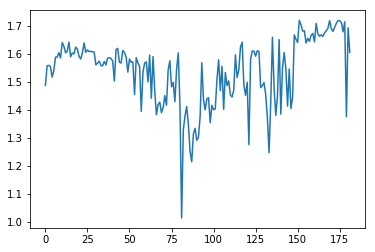

In [32]:
plt.plot(loss_history.history['val_loss'])

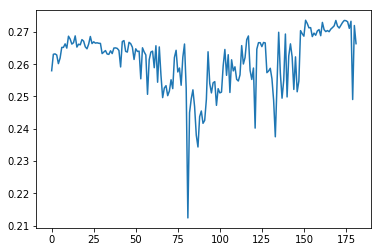

In [34]:
plt.plot(loss_history.history['val_mean_absolute_error'])

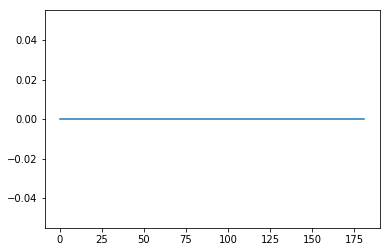

In [35]:
plt.plot(loss_history.history['val_acc'])

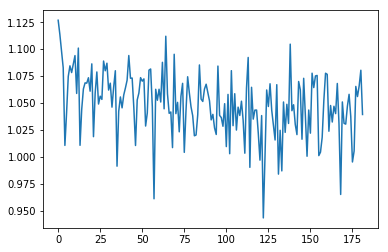

In [36]:
plt.plot(loss_history.history['loss'])

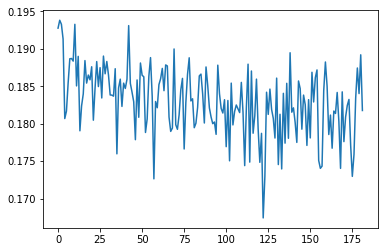

In [37]:
plt.plot(loss_history.history['mean_absolute_error'])

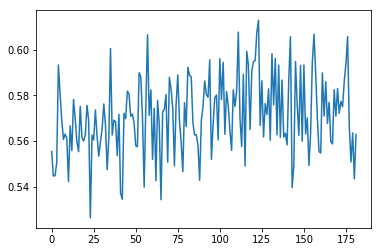

In [38]:
plt.plot(loss_history.history['acc'])

# model with prior info

In [ ]:
N = 3570
M = 6543
N_u = 7
N_v1 = 5 #emb
N_v2 = 15#level


##########################################################
##########################################################
input_user = Input(shape=(N,), name='user')
input_prob = Input(shape=(M,), name='problem')


user_net = Dense(100, activation = 'linear')(input_user)
user_net = Activation('relu')(user_net)
user_net = Dropout(0.2)(user_net)

user_net = Dense(32, activation = 'linear')(user_net)
user_net = Activation('relu')(user_net)

prob_net = Dense(100, activation = 'linear')(input_prob)
prob_net = Activation('relu')(prob_net)
prob_net = Dropout(0.2)(prob_net)

prob_net = Dense(32, activation = 'linear')(prob_net)
prob_net = Activation('relu')(prob_net)

user_model = Model(inputs = [input_user], outputs = [user_net], name = 'user_net')
prob_model = Model(inputs = [input_prob], outputs = [prob_net], name = 'prob_net')

user_model.summary()


##########################################################
##########################################################
input_user_info = Input(shape=(N_u,), name='user')
input_prob_info1 = Input(shape=(M_v1,), name='problem_emb')
input_prob_info2 = Input(shape=(M_v2,), name='problem_level')

vocab_size = 80
prob_info_emb = Embedding(vocab_size, 64, input_length=max_length)(input_prob_info1)
prob_info_time = TimeDistributed(Dense(32))
prob_info_flat = Flatten()(prob_info_time)

prob_info_combine = concatenate([prob_info_flat, input_prob_info2], name = 'merge_prob_features')
# 32+15
prob_info_combine = Dense(32, activation = 'linear')(prob_info_combine)
prob_info_latent = Activation('relu')(prob_info_combine)


user_info_latent = Dense(32, activation = 'linear')(input_user_info)
user_info_latent = Activation('relu')(user_info_latent)


user_info_model = Model(inputs = [input_user_info], outputs = [user_info_latent], name = 'user_info_net')
prob_info_model = Model(inputs = [input_prob_info1,input_prob_info2], outputs = [prob_info_latent], name = 'prob_info_net')

user_info_model.summary()
prob_info_model.summary()
##########################################################

output_user_model = user_model(input_user)
output_prob_model = prob_model(input_prob)

output_user_info_model = user_info_model(input_user_info)
output_prob_info_model = prob_info_model(input_prob_info1,input_prob_info2)



combined_info_features = concatenate([output_user_model, output_prob_model], name = 'merge_info_features')
combined_info_features = Dense(16, activation = 'linear')(combined_info_features)
combined_info_features = Activation('relu')(combined_info_features)

combined_features = concatenate([output_user_info_model, output_prob_info_model], name = 'merge_features')
combined_features = Dense(16, activation = 'linear')(combined_features)
combined_features = Activation('relu')(combined_features)



# input = 32
combined_both_features = concatenate([combined_info_features, combined_features], name = 'merge_both_features')
combined_both_features = Dense(16, activation = 'linear')(combined_both_features)
combined_both_features = Activation('relu')(combined_both_features)
combined_both_features = Dropout(0.1)(combined_both_features)

combined_both_features = Dense(8, activation = 'linear')(combined_both_features)
combined_both_features = Activation('relu')(combined_both_features)

combined_both_features = Dense(6, activation = 'softmax')(combined_both_features)





rec_sys_with_prior = Model(inputs = [input_user, input_prob, input_user_info, input_prob_info1, input_prob_info2], 
                            outputs = [combined_both_features], name = 'recSys_Model_with_prior')

rec_sys_with_prior.summary()

##########################################################
##########################################################

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Activation, Dense, Dropout
from keras.layers import concatenate

import numpy as np
import tensorflow as tf

## define parameters

In [2]:
N = 5
M = 3
K = 2
N_u = 5
M_v = 6

## define a_u and a_v as the tensor, because we are not sampling anything

In [3]:
X = np.random.randn(N,M)
a_u = np.random.randn(N,N_u)
a_v = np.random.randn(M,M_v)

# X = tf.convert_to_tensor(X, dtype=tf.float32)
a_u = tf.convert_to_tensor(a_u, dtype=tf.float32)
a_v = tf.convert_to_tensor(a_v, dtype=tf.float32)


def next_batch(batch_size):
    '''
    returnn data of shape [ [batch,N], [batch,M], [batch,1] ]
    fetch index from the matrix of shape [batch,batch]
    '''
    x_idx = np.random.randint(N,size=(batch_size))
    y_idx = np.random.randint(M,size=(batch_size))
    
    rating_label = []
    for i,j in zip(x_idx,y_idx):
        rating_label.append(X[i][j])
#     rating_label = tf.convert_to_tensor(rating_label,dtype=tf.float32)
#     rating_label = tf.reshape(rating_label,shape=[-1,1])
    
#     return Xn, Xm, rating_label
    return x_idx, y_idx, rating_label

## build model

In [4]:
input_user = tf.placeholder(tf.int32,shape=(None,),name='batch-user')
input_user_hot = tf.one_hot(input_user,N, name='one-hot-user')
user_latent = Dense(K,activation='linear', name='user-latent')(input_user_hot)

input_item = tf.placeholder(tf.int32,shape=(None,),name='batch-item')
input_item_hot = tf.one_hot(input_item,M, name='one-hot-item')
item_latent = Dense(K,activation='linear', name='item-latent')(input_item_hot)

info_user = tf.matmul(input_user_hot, a_u)
info_user_latent = Dense(K,activation='linear',name='info-user-latent')(info_user)

info_item = tf.matmul(input_item_hot, a_v)
info_item_latent = Dense(K,activation='linear', name='item-user-latent')(info_item)

In [5]:
input_user, user_latent, input_item, item_latent, info_user_latent, info_item_latent

(<tf.Tensor 'batch-user:0' shape=(?,) dtype=int32>,
 <tf.Tensor 'user-latent/BiasAdd:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'batch-item:0' shape=(?,) dtype=int32>,
 <tf.Tensor 'item-latent/BiasAdd:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'info-user-latent/BiasAdd:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'item-user-latent/BiasAdd:0' shape=(?, 2) dtype=float32>)

In [6]:
pred_rating = tf.matmul(user_latent,tf.transpose(item_latent))#,transpose_item_latent)
pred_rating = tf.diag_part(pred_rating)
pred_rating = tf.reshape(pred_rating,shape=[-1,1])

pred_rating_content = tf.matmul(info_user_latent,tf.transpose(info_item_latent))#,transpose_info_item_latent)
pred_rating_content = tf.diag_part(pred_rating_content)
pred_rating_content = tf.reshape(pred_rating_content, shape=[-1,1])

final_rating = pred_rating + pred_rating_content

In [7]:
final_rating

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

## loss function (mse. no classification)

In [8]:
actual = tf.placeholder(tf.float32, shape=(None,),name='rating')

loss = tf.reduce_mean(tf.square(pred_rating - actual))
loss_user = tf.reduce_mean(tf.square(user_latent - info_user_latent))
loss_item = tf.reduce_mean(tf.square(item_latent - info_item_latent))
final_loss = loss + loss_user + loss_item

In [9]:
final_loss

<tf.Tensor 'add_2:0' shape=() dtype=float32>

In [10]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(final_loss)

correct_pred = tf.equal(final_rating, actual)
correct_pred = tf.cast(correct_pred, tf.float32)
accuracy = tf.reduce_mean(correct_pred)

accuracy

<tf.Tensor 'Mean_3:0' shape=() dtype=float32>

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 2
for i in range(10):
    batch = next_batch(batch_size)
    feed_data = {input_user : batch[0], input_item : batch[1], actual : batch[2]}
#     if i % 2 == 0:
#         train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
#         print('step %d, training accuracy %g' % (i, train_accuracy))
        
    loss_iter = sess.run(final_loss,feed_dict=feed_data)
    print('step %d, training accuracy %g' % (i, loss_iter))

    sess.run(optimizer, feed_dict=feed_data)

step 0, training accuracy 2.66976
step 1, training accuracy 2.59278
step 2, training accuracy 2.64909
step 3, training accuracy 3.25894
step 4, training accuracy 2.7083
step 5, training accuracy 3.10092
step 6, training accuracy 2.04663
step 7, training accuracy 2.40559
step 8, training accuracy 1.98688
step 9, training accuracy 4.36548
